#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> Project 1. Unsupervised Learning on Bank Marketing Data </span>


## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Introduction </span>
<div style="text-align: justify;">

In order to investigate how financial companies can accurately forecast client responses to direct marketing efforts, we are use the **Bank Marketing Dataset** for this study. This dataset includes demographic data about the target audience, past marketing campaign responses, and other characteristics specific to bank customers. Therefore, unsupervised learning represents a relevant tool for comprehending the complex relationships between consumer preferences and behavior in the banking industry as we can get to know which are the elements that influence consumer engagement and loyalty by looking at patterns in the dataset, such as the frequency of favorable responses to particular campaign types, respondent demographic trends, and the impact of outside factors on campaign success rates.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Real World Problem </span>
<div style="text-align: justify;">

Improving the efficacy of bank marketing initiatives is the main **problem** in this situation. One-size-fits-all tactics are frequently used in traditional marketing techniques, which can lead to low conversion rates and wasteful resource usage. The objective is to find more sophisticated, data-driven approaches that can more effectively target the right clients with the correct offers, raising the probability of favorable reactions and enhancing campaign effectiveness overall.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Role of Unsupervised Learning </span>
<div style="text-align: justify;">

- **Principal Component Analysis (PCA)**: this technique minimizes the dimensionality of the dataset while preserving the majority of its variance. As a result, the dataset is more straightforward to examine and visualize. It can improve the performance of clustering by focusing on the most informative features, thus providing more meaningful customer segments. For instance, we could identify the most relevant features that influence customer responses to marketing campaigns.

- **Cluster Analysis**: based on shared characteristics, including account information, demographics, and past campaign responses, this technique can divide the bank's customer base into discrete clusters. The bank might potentially increase the campaign's success rate by customizing its marketing techniques to each group's unique demands and preferences by identifying these groups.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Objectives </span>
<div style="text-align: justify;">

Using unsupervised learning techniques to find hidden patterns and client segmentation in the bank marketing data is the main **goal** of this investigation. The bank may optimize resource allocation and boost conversion rates by creating tailored marketing campaigns that are more likely to resonate with each customer segment by knowing the traits that set them apart.

</div>

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 2. Exploratory Data Analysis </span>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Variables </span>
<div style="text-align: justify;">

*Description provided by UC Irvine, Machine Learning Respository*

**Main:**
* `age` (numeric)

* `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

* `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

* `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

* `default`: has credit in default? (categorical: 'no','yes','unknown')

* `housing`: has housing loan? (categorical: 'no','yes','unknown')

* `loan`: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

* `contact`: contact communication type (categorical: 'cellular','telephone')

* `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

* `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

* `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

* `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* `previous`: number of contacts performed before this campaign and for this client (numeric)

* `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


**Social and economic context attributes:**

* `emp.var.rate`: employment variation rate - quarterly indicator (numeric)

* `cons.price.idx`: consumer price index - monthly indicator (numeric)

* `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)

* `euribor3m`: euribor 3 month rate - daily indicator (numeric)

* `nr.employed`: number of employees - quarterly indicator (numeric)

* `subscribed`: has the client subscribed a term deposit? (binary: 'yes','no')

</div>


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./bank_marketing_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Check number of rows in dataset
df.shape

(41188, 21)

In [5]:
# Check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [6]:
# List of columns where 'unknown' values should lead to row removal
check = ['education', 'default', 'housing', 'loan', 'job', 'marital']

# Replace 'unknown' with NaN across the specified columns
df.replace({'unknown': np.nan}, inplace = True)

# Drop rows with NaN in any of the specified columns
df.dropna(subset = check, inplace = True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30488.0,39.030012,10.333529,17.000,31.000,37.000,45.000,95.000
duration,30488.0,259.484092,261.714262,0.000,103.000,181.000,321.000,4918.000
campaign,30488.0,2.521451,2.720150,1.000,1.000,2.000,3.000,43.000
pdays,30488.0,956.332295,201.373292,0.000,999.000,999.000,999.000,999.000
previous,30488.0,0.194273,0.522788,0.000,0.000,0.000,0.000,7.000
emp.var.rate,30488.0,-0.071510,1.610399,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,30488.0,93.523311,0.585374,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,30488.0,-40.602263,4.789249,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,30488.0,3.459938,1.777231,0.634,1.313,4.856,4.961,5.045
nr.employed,30488.0,5160.813409,75.158065,4963.600,5099.100,5191.000,5228.100,5228.100


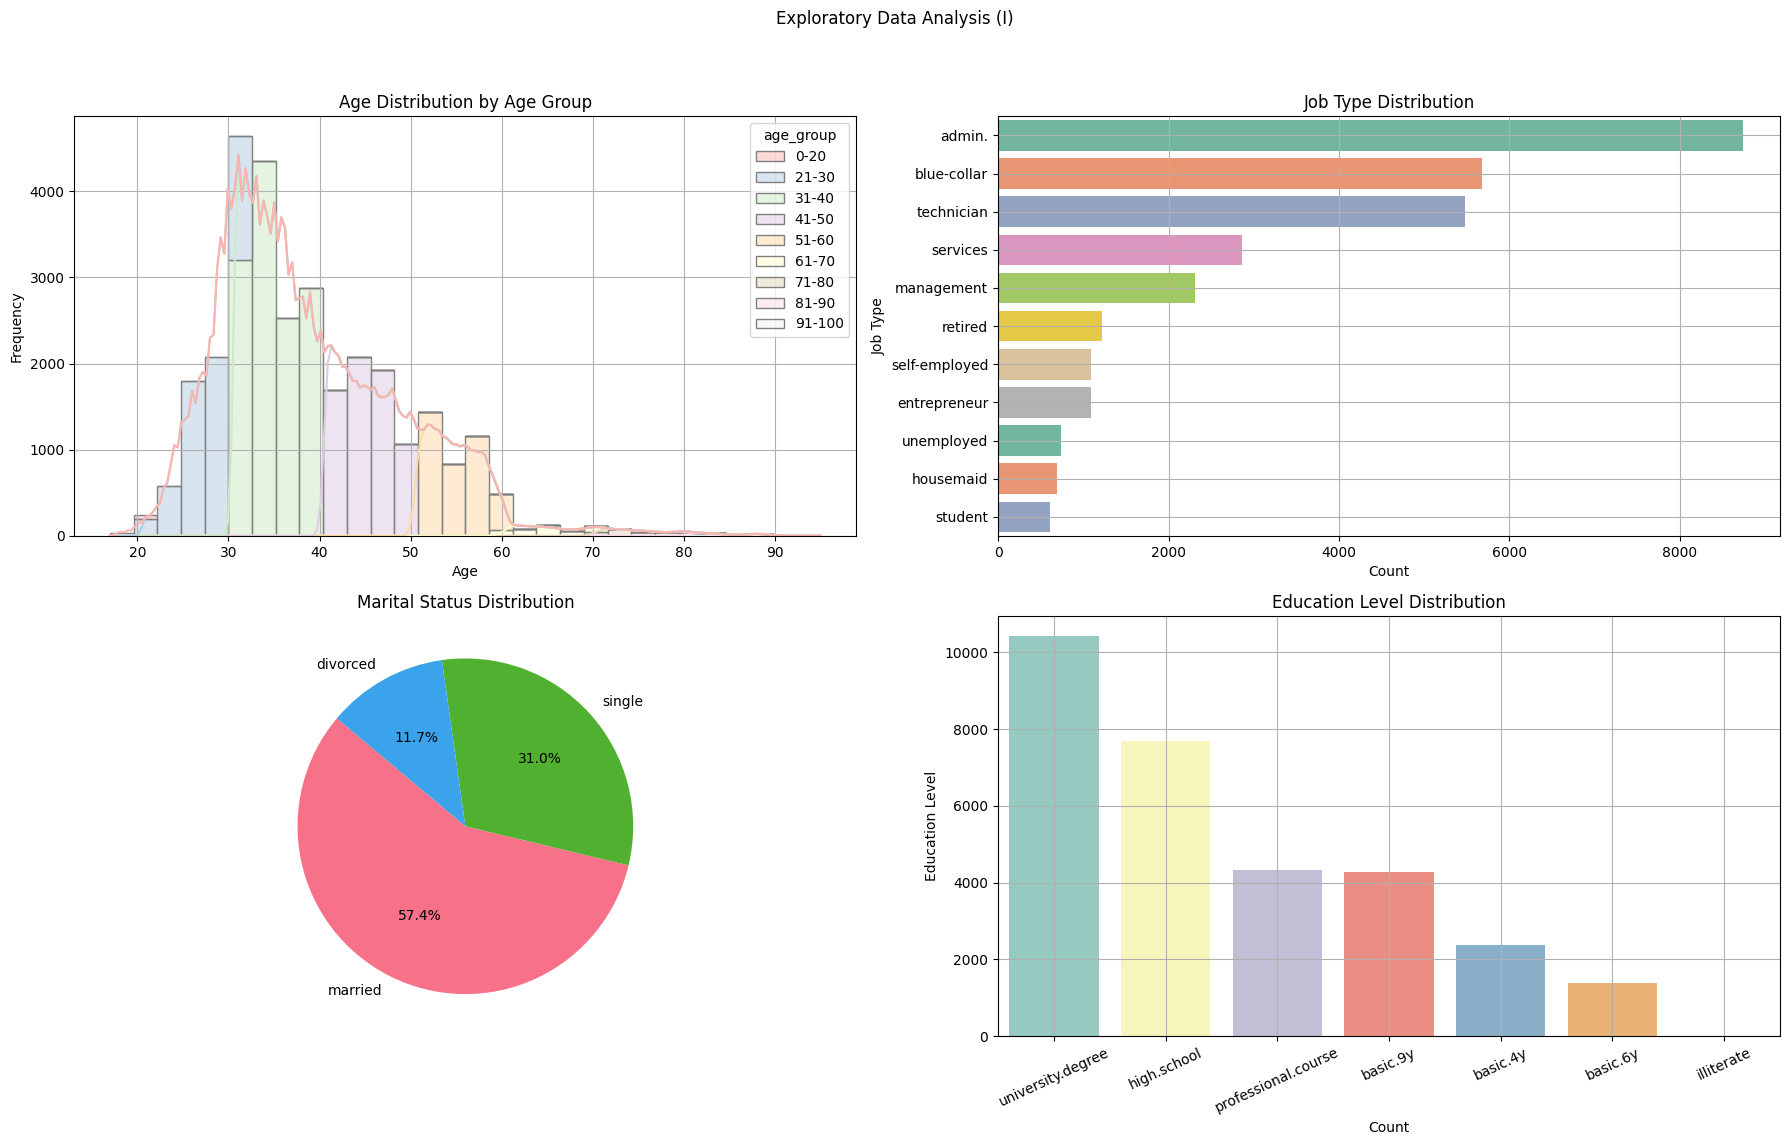

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Subplot area
fig, axes = plt.subplots(2, 2, figsize = (18, 12))
fig.suptitle('Exploratory Data Analysis (I)')

# Age Distribution by Age Group
age_bins = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['age_group'] = pd.cut(df['age'], bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels = age_bins)
sns.histplot(data=df, x = 'age', hue = 'age_group', multiple = 'stack', palette = 'Pastel1', edgecolor = 'gray', ax = axes[0, 0], bins = 30, kde = True)
axes[0, 0].set_title('Age Distribution by Age Group')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True)

# Job Type Distribution
job_types = df['job'].value_counts().index
colors = sns.color_palette("Set2", len(job_types))
for i, job in enumerate(job_types):
    sns.barplot(x=[df[df['job'] == job]['job'].count()], y = [job], ax = axes[0, 1], color = colors[i])
axes[0, 1].set_title('Job Type Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Job Type')
axes[0, 1].grid(True)

# Marital Status Distribution
marital_counts = df['marital'].value_counts()
axes[1, 0].pie(marital_counts, labels = marital_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("husl", len(marital_counts)))
axes[1, 0].set_title('Marital Status Distribution')

# Education Level Distribution
sns.countplot(x = 'education', data = df, order = df['education'].value_counts().index, ax = axes[1, 1], palette = 'Set3')
axes[1, 1].set_title('Education Level Distribution')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education Level')
axes[1, 1].tick_params(axis = 'x', rotation = 25, labelsize = 'medium')
axes[1, 1].grid(True)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()


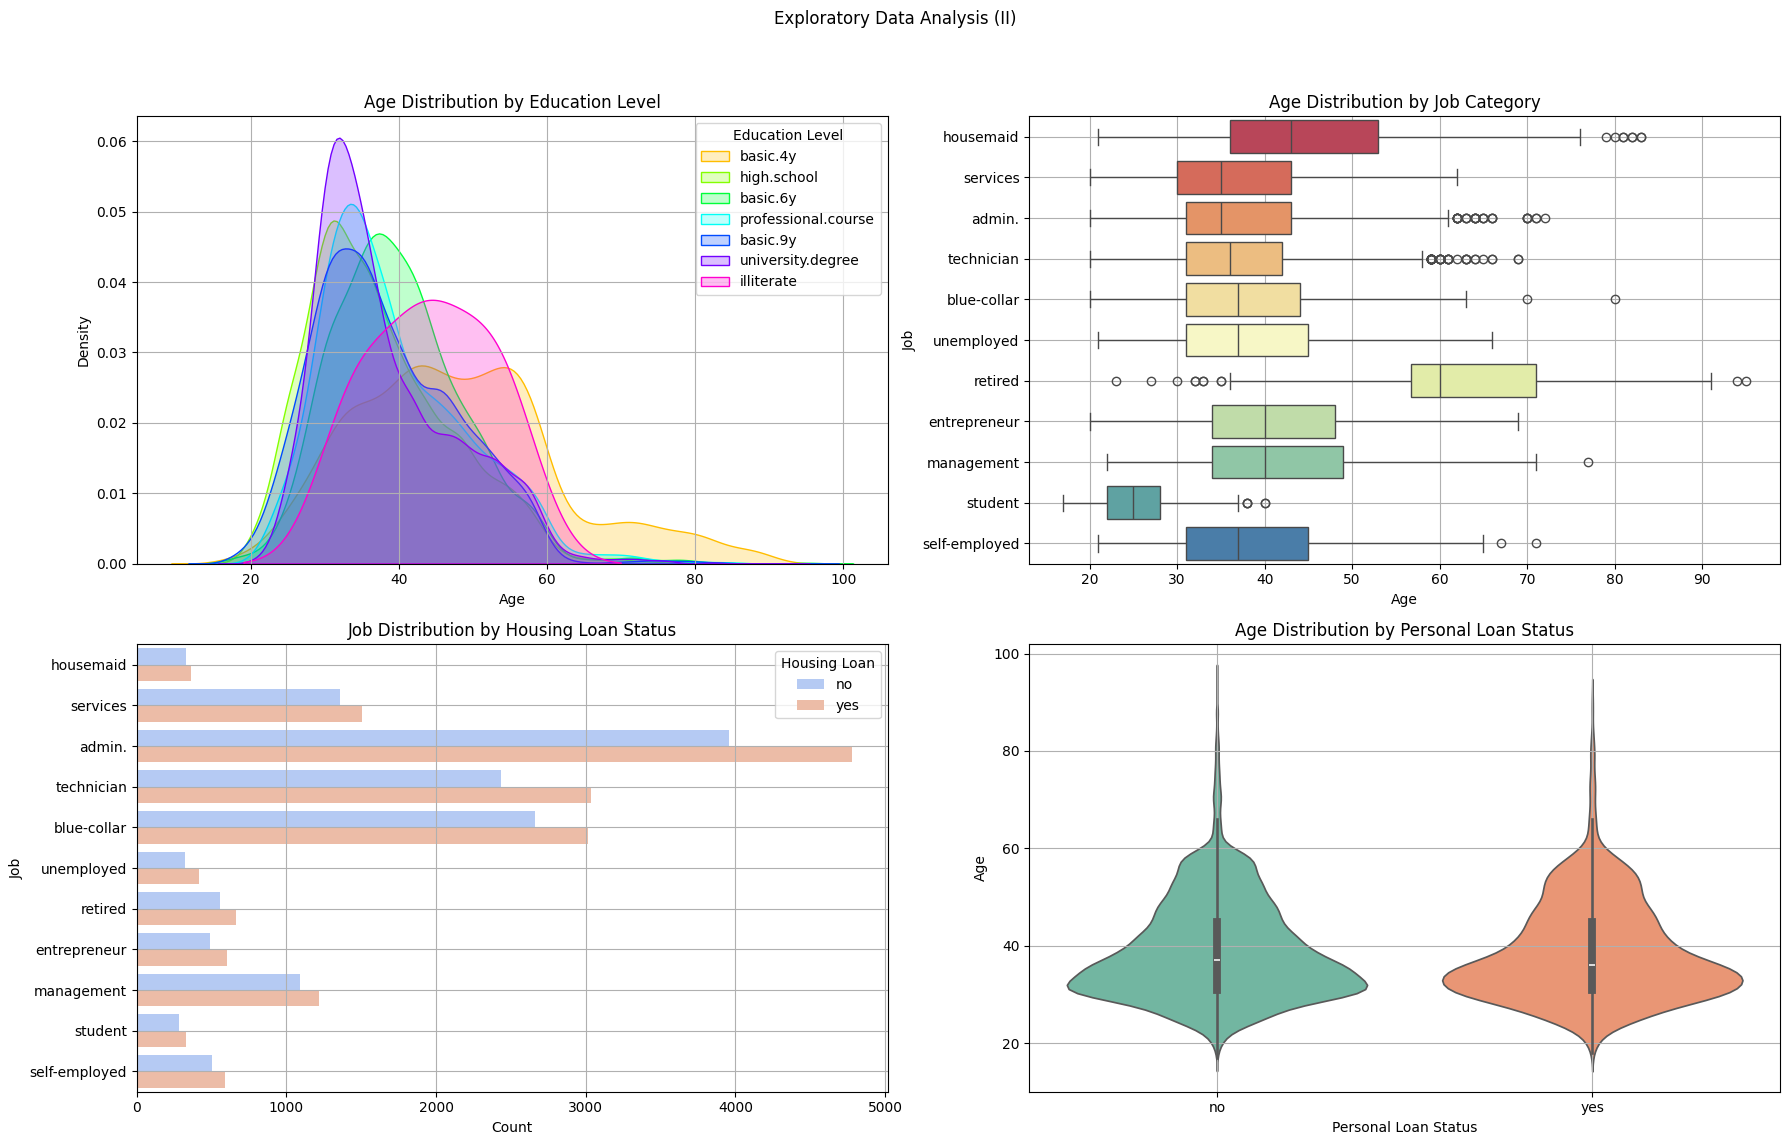

In [9]:
warnings.filterwarnings("ignore")

# Setting up the subplot area
fig, axes = plt.subplots(2, 2, figsize = (18, 12))  # Adjust the size as needed
fig.suptitle('Exploratory Data Analysis (II)')

# Age Distribution by Education Level
education_levels = df['education'].unique()
palette = sns.color_palette("hsv", len(education_levels))
for i, level in enumerate(education_levels):
    sns.kdeplot(df[df['education'] == level]['age'], ax = axes[0, 0], shade = True, label = level, color = palette[i])
axes[0, 0].set_title('Age Distribution by Education Level')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend(title = 'Education Level')
axes[0, 0].grid(True)

# Age and Job Distribution
sns.boxplot(x = 'age', y = 'job', data = df, ax = axes[0, 1], palette = 'Spectral')
axes[0, 1].set_title('Age Distribution by Job Category')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Job')
axes[0, 1].grid(True)

# Job and Housing Loan Distribution
sns.countplot(y = 'job', hue = 'housing', data = df, ax = axes[1, 0], palette = 'coolwarm')
axes[1, 0].set_title('Job Distribution by Housing Loan Status')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Job')
axes[1, 0].legend(title = 'Housing Loan')
axes[1, 0].grid(True)

# Age and Personal Loan Distribution
sns.violinplot(x = 'loan', y = 'age', data = df, palette = 'Set2')
axes[1, 1].set_title('Age Distribution by Personal Loan Status')
axes[1, 1].set_xlabel('Personal Loan Status')
axes[1, 1].set_ylabel('Age')
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for the main title and subplots
plt.show()


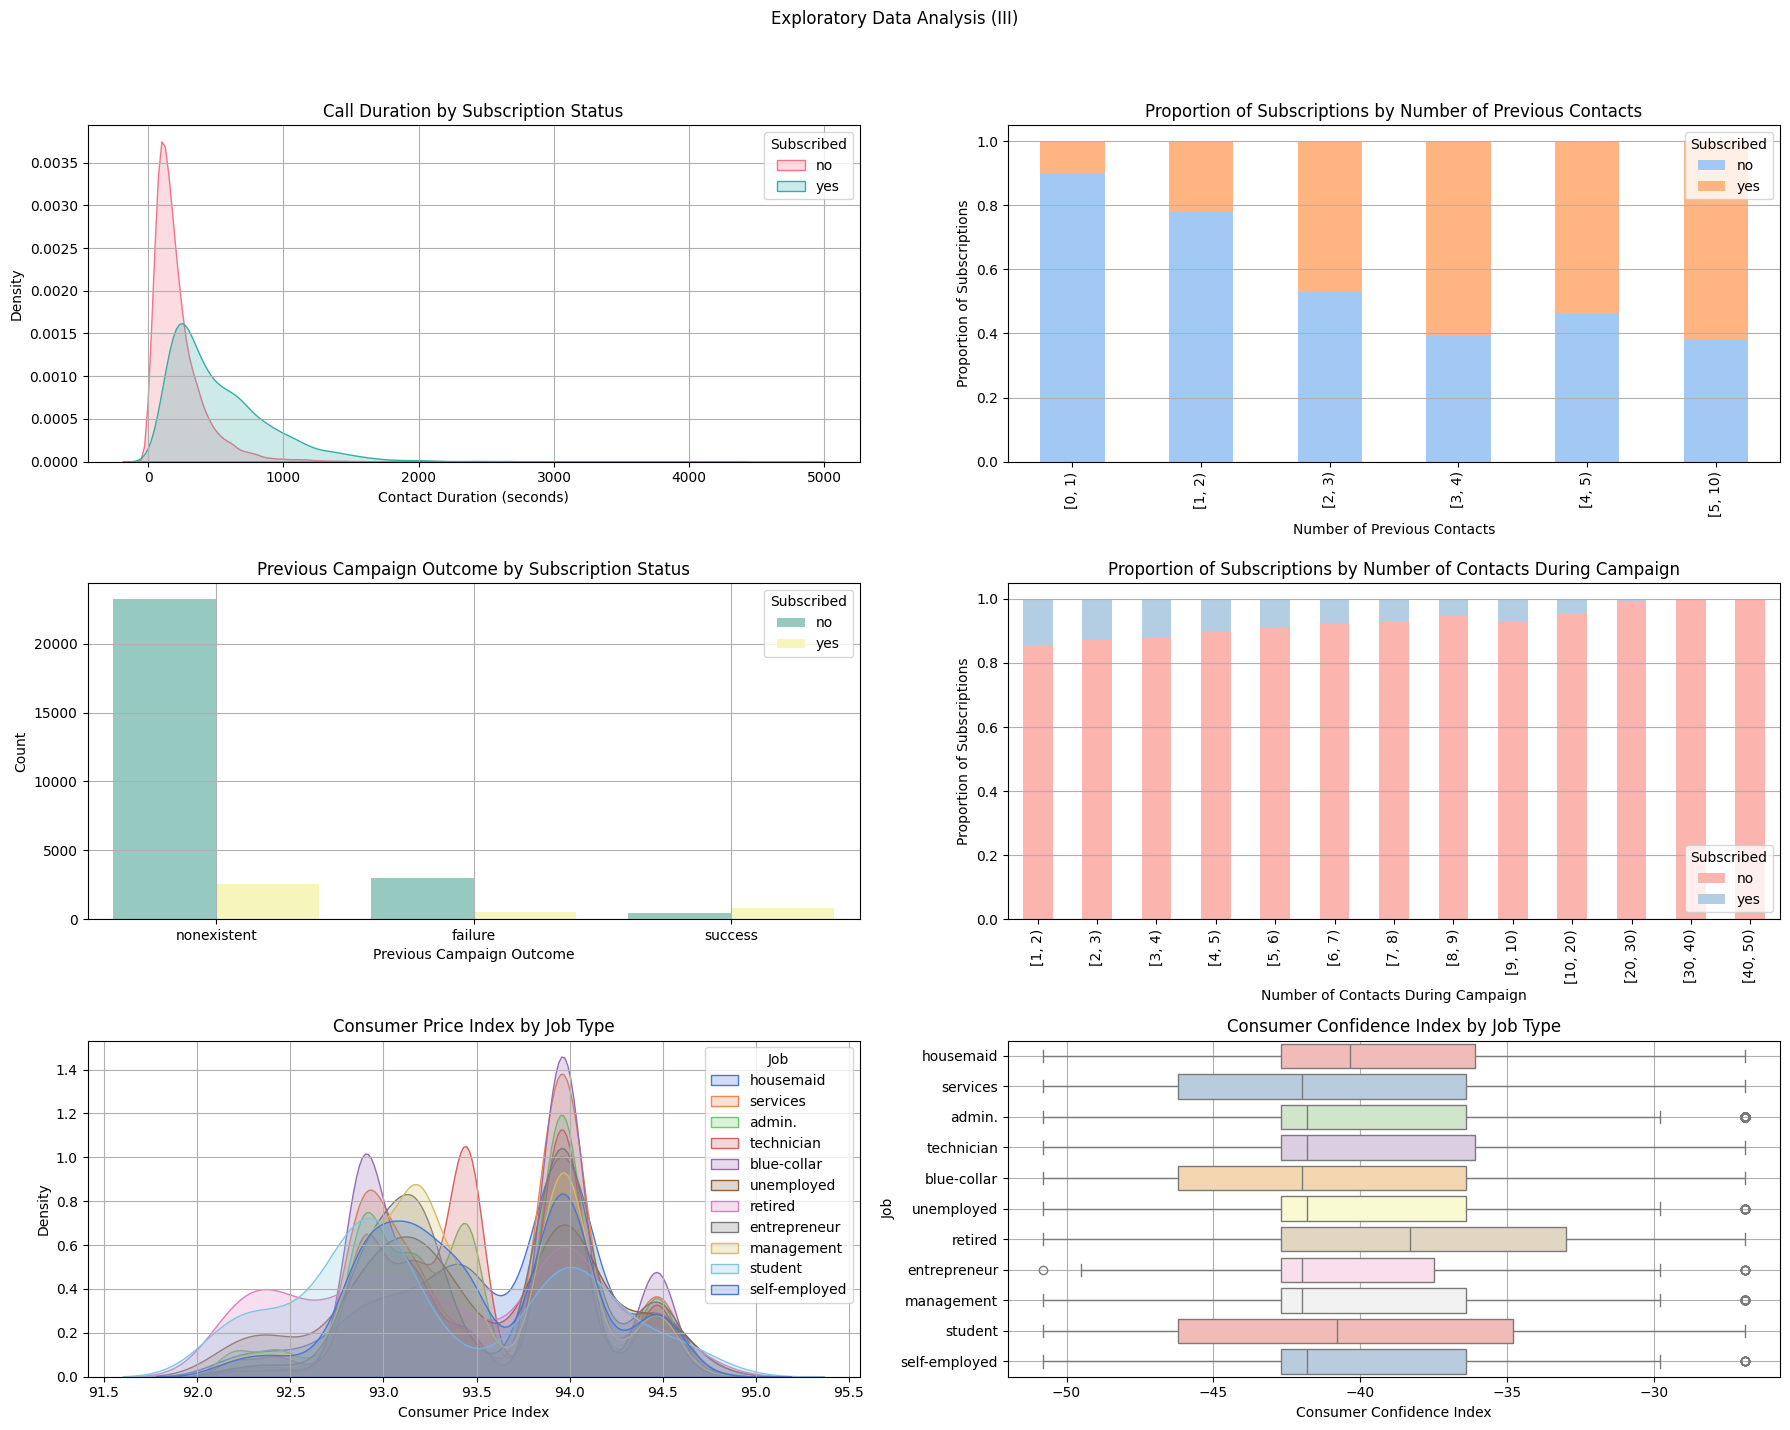

In [10]:
# Setting up the subplot area
fig, axes = plt.subplots(3, 2, figsize = (18, 15))  # Adjust the size as needed
fig.suptitle('Exploratory Data Analysis (III)')

# Duration and Subscribed
subscribed_levels = df['subscribed'].unique()
palette = sns.color_palette("husl", len(subscribed_levels))
for i, level in enumerate(subscribed_levels):
    sns.kdeplot(df[df['subscribed'] == level]['duration'], ax = axes[0, 0], shade = True, label = level, color = palette[i])
axes[0, 0].set_title('Call Duration by Subscription Status')
axes[0, 0].set_xlabel('Contact Duration (seconds)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend(title = 'Subscribed')
axes[0, 0].grid(True)


# Previous and Subscribed
previous_bins = [0, 1, 2, 3, 4, 5, 10, 20, 30]  # Bin the 'previous' data into categories
df['previous_group'] = pd.cut(df['previous'], bins = previous_bins, right = False, include_lowest = True)
ct = pd.crosstab(df['previous_group'], df['subscribed']) # Crosstab of the binned 'previous' data and 'subscribed'
ct_norm = ct.div(ct.sum(axis = 1), axis = 0) # Normalized crosstab to get proportions instead of counts
ct_norm.plot(kind = 'bar', stacked = True, color = sns.color_palette("pastel"), ax = axes[0, 1])
axes[0, 1].set_title('Proportion of Subscriptions by Number of Previous Contacts')
axes[0, 1].set_xlabel('Number of Previous Contacts')
axes[0, 1].set_ylabel('Proportion of Subscriptions')
axes[0, 1].legend(title = 'Subscribed', loc = 'upper right')
axes[0, 1].grid(axis='y')

# Poutcome and Subscribed
sns.countplot(x = 'poutcome', hue = 'subscribed', data = df, ax = axes[1, 0], palette = 'Set3')
axes[1, 0].set_title('Previous Campaign Outcome by Subscription Status')
axes[1, 0].set_xlabel('Previous Campaign Outcome')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title = 'Subscribed')
axes[1, 0].grid(True)

# Campaign and Subscribed
campaign_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]  # Bin the 'previous' data into categories
df['campaign_group'] = pd.cut(df['campaign'], bins = campaign_bins, right = False, include_lowest = True)
ct = pd.crosstab(df['campaign_group'], df['subscribed']) # Crosstab of the binned 'previous' data and 'subscribed'
ct_norm = ct.div(ct.sum(axis=1), axis = 0) # Normalized crosstab to get proportions instead of counts
ct_norm.plot(kind = 'bar', stacked = True, color = sns.color_palette("Pastel1"), ax = axes[1, 1])
axes[1, 1].set_title('Proportion of Subscriptions by Number of Contacts During Campaign')
axes[1, 1].set_xlabel('Number of Contacts During Campaign')
axes[1, 1].set_ylabel('Proportion of Subscriptions')
axes[1, 1].legend(title = 'Subscribed', loc = 'lower right')
axes[1, 1].grid(axis = 'y')

# Consumer Price Index and Age with Age Groups as hue
job_levels = df['job'].unique()
palette = sns.color_palette("muted", len(job_levels))
for i, level in enumerate(job_levels):
    sns.kdeplot(df[df['job'] == level]['cons.price.idx'], ax = axes[2, 0], shade = True, label = level, color = palette[i])
axes[2, 0].set_title('Consumer Price Index by Job Type')
axes[2, 0].set_xlabel('Consumer Price Index')
axes[2, 0].set_ylabel('Density')
axes[2, 0].legend(title = 'Job')
axes[2, 0].grid(True)

# Consumer Confidence Index and Job
sns.boxplot(x = 'cons.conf.idx', y = 'job', data = df, ax = axes[2, 1], palette = 'Pastel1')
axes[2, 1].set_title('Consumer Confidence Index by Job Type')
axes[2, 1].set_xlabel('Consumer Confidence Index')
axes[2, 1].set_ylabel('Job')
axes[2, 1].grid(True)

# Show the plot
plt.tight_layout(rect = [0, 0.03, 1, 0.95])  # Adjust for the main title and subplots
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Insights Gained from Initial Exploration </span>
<div style="text-align: justify;">

The data is comprised of 21 different variables. In the following, some insights and relationships extracted from the data will 
be further explored. The prevailing age group ranges from 30 to 40 years of age. There are three types of job considerably more 
frecuent among the targeted audience, which are administrators, blue-collar workers and technicians. The fact that this age group 
and job positions account for the highest density can be deducted from the box diagram that correlates both features. The 25% 
and 75% percentile of the three jobs encaptures the 30 to 40 age group wholly. The same situation occurs with the education degree. 
The majority of the audience is in possesion of either a university degree or have finished high school. Those who have undergone one 
those educations are aged between 25 and 40 mainly. 

As for loans, either house or personal ones, the distributions even out. There is a very similar amount of people that have taken a 
personal loan and who haven't. House loans are equally frequent independt of the employment of each customer. There is evidently a higher 
density of house loans among technicians, administrators and blue-collar workers, since there are more customers covered that occupy
such positions. However, analyzing the bar chart, the prevailing trend is that more people than not have a house loan. 

There exists a very interesting relationship between the subscriptions of new new term deposits and the timley occurrence of the contact. 
During the time previous to the campaign the more times the audience was contacted the more subscriptions there tended to be. This trend
utterly switches during the campaign. During that time the more calls a person received, the less likely he was to subscribe a new deposit. 
Before the campaign 3 calls was an optimum amount to try to get a person to subscribe. During the campaign, however, if the second call had
not succeeded it would be advisable to drop that customer and move towards the next. Another conclusion, that seems more or less logical, is 
that calls with subscribed members or people that ended up subscribing have a tendency to have a longer duration.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Feature Engineering Possibilities </span>
<div style="text-align: justify;">

Alongside the 21 variables inherent to the dataset, three new variables were created, `age_group`, `campaign_group` and `previous_group`. The name
of the `age_group` variable is self explanatory. This new variable groups ages in decades, and allows for a bit of a broader analysis that 
does not go in the detail of featuring every individual year. The latter variables complement each other. `campaign_group` features those
events that take place during the marketing campaign of the bank. In contrast, `previous_group` accounts for those events, such as 
subscriptions that took place prior to the beginning of the campaign. 

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Variable Selection for PCA </span>
<div style="text-align: justify;">

In order to perform the PCA analysis adn the clustering on the dataset only a fraction of the 21 will be selected. The 2D loading plot offers very valuable information to choose those variables that should be of higher relevance, or at least contain more information. A total of 10 variables make up the final dataset, which include `job`, `education`, `housing`, `contact`, `poutcome`, `cons.price.idx`, `age_group`, `previous_group`, `campaign_group`and `subscribed`. The selected features seemingly have larger projections and are very orthogonal with one anorther. 

</div>



---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Principal Component Analysis (PCA) </span>

In [11]:
df1 = (df.iloc[:, [1,3,5,7,14,16,21,22,23]])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             30488 non-null  object  
 1   education       30488 non-null  object  
 2   housing         30488 non-null  object  
 3   contact         30488 non-null  object  
 4   poutcome        30488 non-null  object  
 5   cons.price.idx  30488 non-null  float64 
 6   age_group       30488 non-null  category
 7   previous_group  30488 non-null  category
 8   campaign_group  30488 non-null  category
dtypes: category(3), float64(1), object(5)
memory usage: 2.7+ MB


In [12]:
# Create a new DataFrame without the excluded columns
dfX = df1.dropna()#df.drop(columns = exclude)

dfX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             30488 non-null  object  
 1   education       30488 non-null  object  
 2   housing         30488 non-null  object  
 3   contact         30488 non-null  object  
 4   poutcome        30488 non-null  object  
 5   cons.price.idx  30488 non-null  float64 
 6   age_group       30488 non-null  category
 7   previous_group  30488 non-null  category
 8   campaign_group  30488 non-null  category
dtypes: category(3), float64(1), object(5)
memory usage: 2.7+ MB


In [13]:
dfX.shape

(30488, 9)

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Encoding </span>
<div style="text-align: justify;">

In order to apply $PCA$ successfully, all features must be in numeric format. In order to encode all columns three different methods are used, ordinal, binary and nominal.  The simplest encoding is the binary one. This encoding applies to features that only have two, generally oposing, options (yes or no, true or false) and assigns a 0 and a 1 to each possibility respectively. In the dataset at hand 
this methodology applies to the columns 'default', 'housing' and 'loan'. 

The input for ordinal encoding should be an array of string or integers, each of which denotes a categorical feature, which follow some sort of order, rank or sequence. The different features are assigned and converted to ordinal integers. The result of such an encoding is that the initial array of features results in an array of integers ranging from 0 to the cuantity of different categories - 1. In the prevailing dataset this type of encoding applies to `age_group`, `previous_group`, `campaign_group` and `education`. 

Lastly the nominal encoding is very similar to the ordinal encoding, but in this case there is no order or rank to the features of each variable. For this purpose we will be using the `OneHotEncoder` from the `sklearn` library. This one-hot encoding scheme creates a binary column for each category. The encoding returns a sparse matrix of ones and zeros that identify univocally each feature. For the banking dataset this encoding is necessary for `job`, `contact` and `poutcome`. 

</div>

In [14]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

# Define which columns are to be encoded using which method
ordinal_cols = ['education']
binary_cols = ['housing'] # , 'loan'
nominal_cols = ['job', 'contact', 'poutcome'] #'marital',, 'month', 'day_of_week',

dfX['previous_group'] = dfX['previous_group'].astype(str)
dfX['campaign_group'] = dfX['campaign_group'].astype(str)

# Apply ordinal encoding
categories_order = {
    'age_group': age_bins,
    'previous_group': ['[0, 1)', '[1, 2)', '[2, 3)', '[3, 4)', '[4, 5)', '[5, 10)', '[10, 20)', '[20, 30)'],
    'campaign_group': ['[1, 2)', '[2, 3)', '[3, 4)', '[4, 5)', '[5, 6)', '[6, 7)', '[7, 8)', '[8, 9)', '[9, 10)', '[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)'],
    'education': ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
}
for column, order in categories_order.items():
    ordinal_encoder = OrdinalEncoder(categories = [order])
    dfX[column] = ordinal_encoder.fit_transform(dfX[[column]])

# Apply binary encoding using LabelEncoder
label_encoder = LabelEncoder()
for col in binary_cols:
    dfX[col] = label_encoder.fit_transform(dfX[col])

# Apply one-hot encoding without the 'sparse' argument
one_hot_encoder = OneHotEncoder(drop='first')  # No 'sparse' argument here
nominal_encoded = one_hot_encoder.fit_transform(dfX[nominal_cols]).toarray()  # Convert to dense array format with .toarray()
column_names = one_hot_encoder.get_feature_names_out(nominal_cols)  # Get the column names for the one-hot encoded features
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=column_names, index=dfX.index)  # Create a DataFrame

# Concatenate the original DataFrame with the one-hot encoded DataFrame
dfX = pd.concat([dfX, nominal_encoded_df], axis=1)
original_columns = ['job','contact','poutcome']# 'month','day_of_week', , 'marital'

# Drop these columns after encoding
dfX = dfX.drop(columns = original_columns)

$Rank(X):$ number of dimensions that can be eliminated from $X$ without performing $PCA$

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.linalg import svdvals

X_std = StandardScaler().fit_transform(dfX)
singular_values = svdvals(np.cov(X_std.T))
X_rank = np.sum(singular_values > 1e-10)
X_rank


19

In this case, no variables can be eliminated before performing $PCA$

In [16]:
L_linspace = np.linspace(1, X_rank, 10, dtype=int)

L_linspace

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [17]:
RMSE = []

for index, L in enumerate(L_linspace):
    pca = PCA(n_components=L)
    X_transformed = pca.fit_transform(X_std)
    X_proj = pca.inverse_transform(X_transformed)
    RMSE.append(mean_squared_error(X_std, X_proj, squared=False))

In [18]:
pca.components_.shape

(19, 19)

In [19]:
eigenvalues = pca.explained_variance_
eigenvalues

array([2.57409102, 1.77802632, 1.4976383 , 1.36428501, 1.15298572,
       1.1117769 , 1.05501739, 1.04206931, 1.03326159, 1.02758768,
       1.00596303, 0.97804976, 0.95168165, 0.60083604, 0.57349133,
       0.46804354, 0.42710115, 0.24658841, 0.11212907])

<div style="text-align: justify;">

Each eigenvalue corresponds to a principal component and represents the amount of variance that is attributed to that component.
The eigenvalues are usually arranged in descending order, where the first eigenvalue accounts for the highest amount of variance in the data, followed by the second and so forth. 

The *Kaiser Rule* is a rule of thumb used for selecting the number of principal components to keep with $PCA$. This criterion states that only the eigenvalues greater than one should be kept, that is:

$$L = 11$$
</div>


In [20]:
variance_explained = pca.explained_variance_ratio_
variance_explained

array([0.13547403, 0.09357726, 0.07882048, 0.07180212, 0.06068147,
       0.05851265, 0.05552541, 0.05484395, 0.05438041, 0.05408179,
       0.05294369, 0.05147461, 0.05008687, 0.03162191, 0.03018276,
       0.02463306, 0.02247827, 0.01297791, 0.00590134])

In [21]:
cum_variance_explained = pca.explained_variance_ratio_.cumsum()
cum_variance_explained 

array([0.13547403, 0.22905129, 0.30787178, 0.3796739 , 0.44035537,
       0.49886802, 0.55439343, 0.60923738, 0.66361779, 0.71769958,
       0.77064326, 0.82211788, 0.87220474, 0.90382666, 0.93400942,
       0.95864248, 0.98112075, 0.99409866, 1.        ])

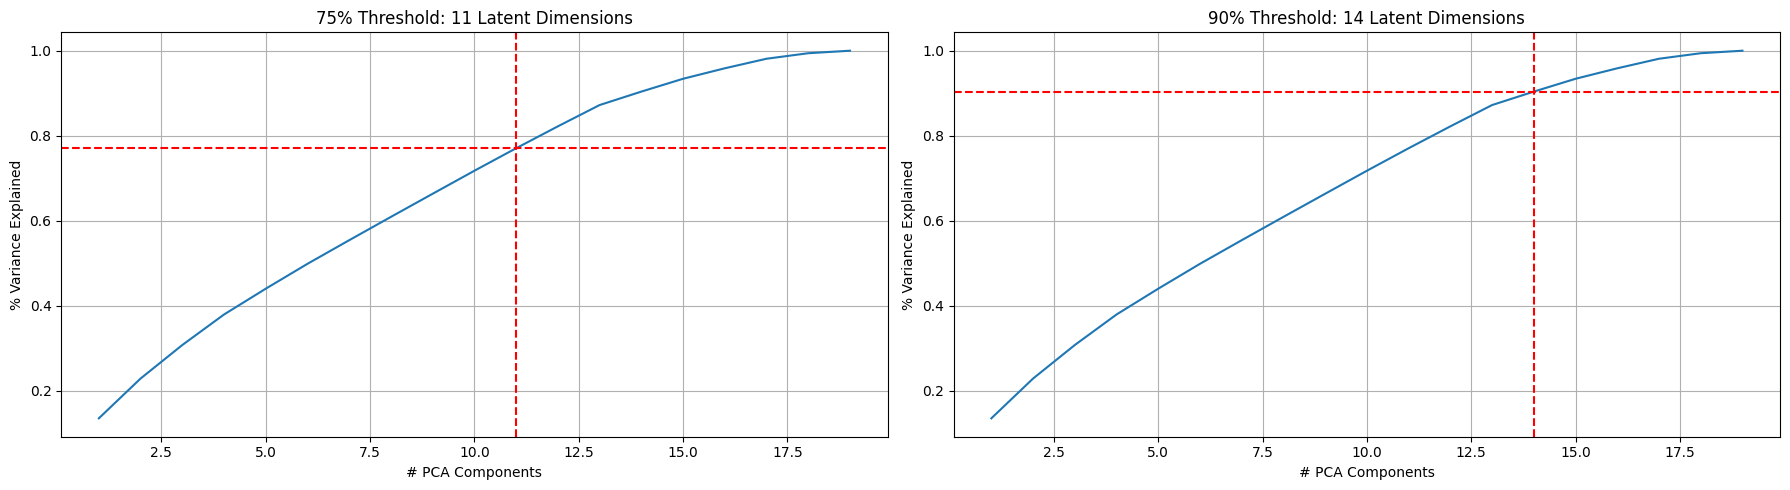

In [22]:
# Find the number of components for 75% threshold
idx_75 = np.where(cum_variance_explained > 0.75)[0][0]

# Find the number of components for 90% threshold
idx_90 = np.where(cum_variance_explained > 0.9)[0][0]

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# First subplot for 75% threshold
sns.lineplot(x = range(1, len(cum_variance_explained) + 1), y = cum_variance_explained, ax=ax[0])
ax[0].axvline(idx_75 + 1, c='r', linestyle='--')  # Add +1 because idx_75 is zero-indexed
ax[0].axhline(cum_variance_explained[idx_75], c='r', linestyle='--')
ax[0].set_xlabel('# PCA Components')
ax[0].set_ylabel('% Variance Explained')
ax[0].set_title('75% Threshold: ' + str(idx_75 + 1) + ' Latent Dimensions')
ax[0].grid(True)

# Second subplot for 90% threshold
sns.lineplot(x = range(1, len(cum_variance_explained) + 1), y = cum_variance_explained, ax=ax[1])
ax[1].axvline(idx_90 + 1, c='r', linestyle='--')  # Add +1 because idx_90 is zero-indexed
ax[1].axhline(cum_variance_explained[idx_90], c='r', linestyle='--')
ax[1].set_xlabel('# PCA Components')
ax[1].set_ylabel('% Variance Explained')
ax[1].set_title('90% Threshold: ' + str(idx_90 + 1) + ' Latent Dimensions')
ax[1].grid(True)

# Display the plot
plt.tight_layout()
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Trade-off: Kaisser Rule vs Explained Variance</span>
<div style="text-align: justify;">

The trade-off between these two criterions involves balacing simplicity, explicability and accuracy:

* By choosing the latent dimensions according to the *Kaiser Rule*, the model may end up more straightforward as it has fewer components. This is useful as the model is simpler and computationally less intensive to train, however, the accuracy may me reduced as a result of missing some of the variance in the data 

* Opting for the number of components that explain at least 90% of the variance leads to a model that captures the data's underlying structure. Nonetheless, the model is more complex and might be harder to interpret.
 
The decision chosen ...
</div>


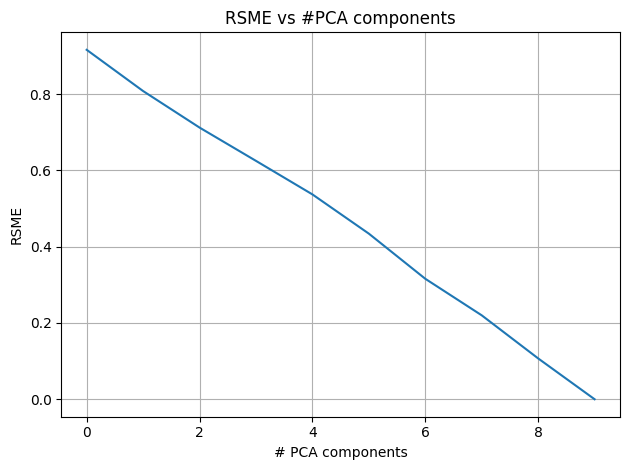

In [23]:
sns.lineplot(RMSE)
plt.xlabel('# PCA components')
plt.ylabel('RSME')
plt.grid(True)
plt.title('RSME vs #PCA components')
plt.tight_layout()
plt.show()


In [24]:
feature_names = dfX.columns

n_features = pca.n_features_in_

# Loadings: que estadísticas de los datos están recogiendo la mayor varianza (W)
loadings = pca.components_

pc_list = [f'PC{i}' for i in list(range(1, n_features))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
feature_names,,,,,,,,,,,,,,,,,,
education,0.065583,-0.607866,0.124452,0.173606,-0.054361,-0.084408,0.008014,0.027634,-0.041890,0.013533,-0.003863,-0.001968,-0.016418,-0.239711,-0.391386,-0.439120,-0.029670,-0.403656
housing,0.052843,-0.042007,0.054266,-0.193007,0.038298,0.049694,0.122820,-0.048243,-0.023677,0.187305,-0.338216,0.733916,-0.494725,0.015433,-0.007539,0.013133,-0.001744,0.001718
cons.price.idx,-0.315019,0.107783,-0.166112,0.559161,0.083486,-0.043732,0.001773,-0.008781,-0.008195,0.007169,-0.013535,0.062320,-0.175089,-0.060175,-0.009370,-0.012728,0.699262,-0.008263
age_group,0.070654,0.298061,0.599412,0.135813,0.030367,-0.005369,-0.011885,0.005397,-0.013054,0.003431,-0.006153,-0.003936,-0.021041,0.209845,0.334655,-0.608106,0.020667,0.016633
previous_group,0.537277,0.092217,-0.166516,0.224819,0.033253,-0.023177,-0.017844,0.019771,-0.037621,-0.006251,-0.081014,0.011698,0.016375,0.257305,-0.169232,-0.014571,0.135672,-0.005193
campaign_group,-0.120978,-0.016813,-0.000814,0.176189,0.081982,0.020931,-0.000495,0.212750,-0.003129,0.059333,-0.048801,0.544073,0.771432,0.029411,0.026402,0.015410,-0.052227,-0.006991
job_blue-collar,-0.095792,0.486791,-0.293029,-0.288480,0.113715,-0.343467,-0.105903,0.103448,-0.150528,0.039427,-0.098287,-0.011322,0.030538,-0.082711,-0.044492,-0.180143,-0.003673,-0.596430
job_entrepreneur,-0.015481,-0.019147,0.052566,0.068084,-0.125432,-0.028811,0.524566,-0.592584,-0.465325,-0.107545,-0.140854,-0.040194,0.175174,0.055094,0.126528,0.122999,0.006017,-0.186117
job_housemaid,-0.011496,0.133779,0.058635,0.040151,0.009357,0.105672,0.151476,-0.251183,0.766646,-0.357762,-0.306146,-0.009497,0.075481,-0.029948,-0.093016,0.038889,-0.021534,-0.229894


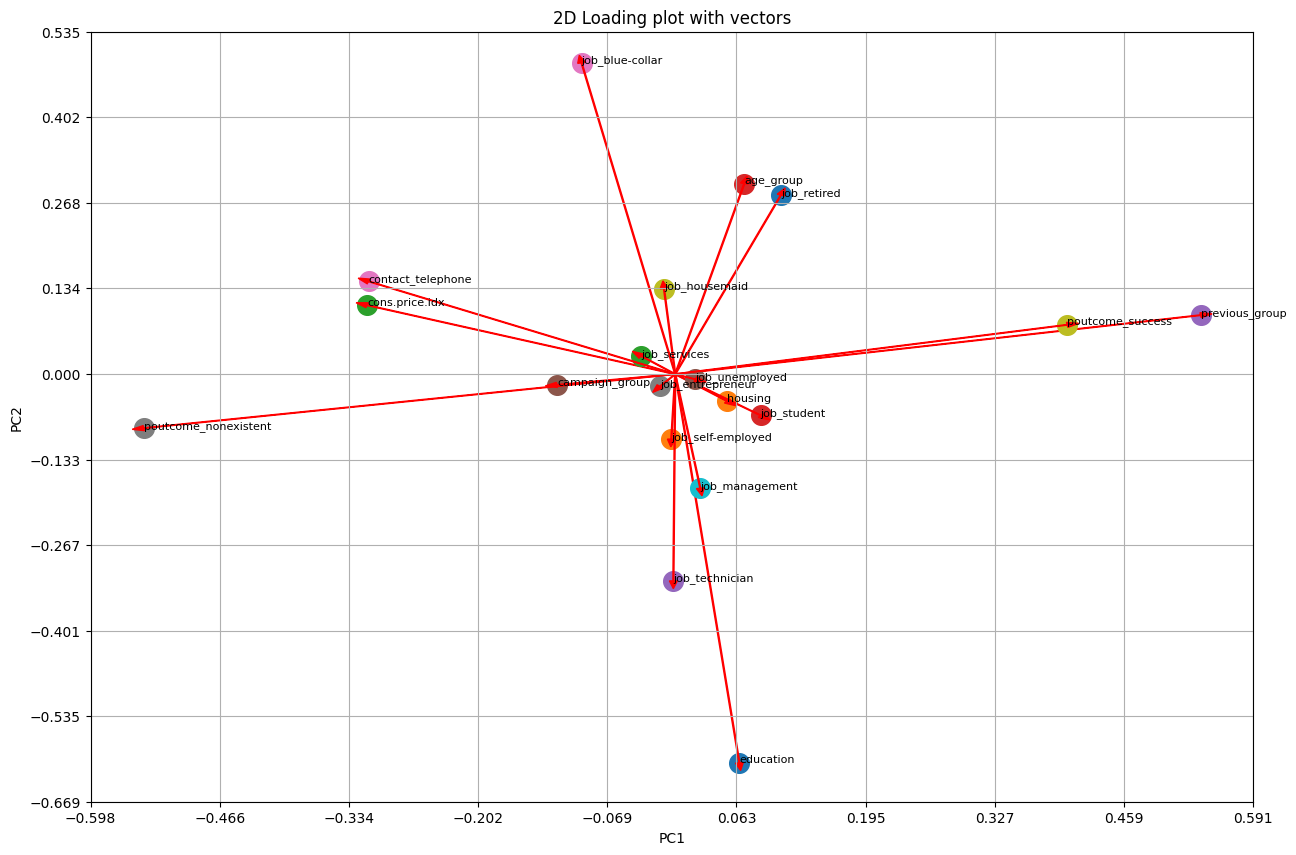

In [25]:
xs = loadings_df.iloc[:, 0]
ys = loadings_df.iloc[:, 1]
 
plt.figure(figsize = (15,10))
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs.iloc[i], ys.iloc[i], s = 200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs.iloc[i], # length of the arrow along x
        ys.iloc[i], # length of the arrow along y
        color = 'r', 
        head_width = 0.008
        )
    plt.text(xs.iloc[i], ys.iloc[i], varnames, fontsize=8)
 
# Define the axes
xmin, xmax = xs.min() * 1.1, xs.max() * 1.1
ymin, ymax = ys.min() * 1.1, ys.max() * 1.1
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Set x and y ticks
xticks = np.linspace(xmin, xmax, num=10)
yticks = np.linspace(ymin, ymax, num=10)
plt.xticks(xticks)
plt.yticks(yticks)

plt.xlabel('PC1')
plt.ylabel('PC2')

# Show plot
plt.title('2D Loading plot with vectors')
plt.grid(True)
plt.show()

In [26]:
sorted_components = sorted(enumerate(variance_explained), key=lambda x: x[1], reverse=True)
sorted_components

[(0, 0.135474030902023),
 (1, 0.09357726338692812),
 (2, 0.0788204832956051),
 (3, 0.07180211892818215),
 (4, 0.0606814685692451),
 (5, 0.05851265420638592),
 (6, 0.055525409953969734),
 (7, 0.054843954306072744),
 (8, 0.054380405176558205),
 (9, 0.05408178813872433),
 (10, 0.05294368612135457),
 (11, 0.05147461458772328),
 (12, 0.050086865013115815),
 (13, 0.03162191242614316),
 (14, 0.030182764141622208),
 (15, 0.02463306248085007),
 (16, 0.022478270590268284),
 (17, 0.01297791159594734),
 (18, 0.0059013361792811005)]

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Variables for Clustering </span>
<div style="text-align: justify;">

We saw that according to the according to the Kaiser Rule 11 latent dimensions would be enough to achieve accurate results with a simpler model than if we were to use the 14 dimensions that the Explained Variance suggest. According to the RMSE gaph, from 8 dimensions onwards the mean square error becomes very slim, so that either option should work properly. For the current scenario we are going to chose 11 as the number of latent dimensions, since those dimensions already account for 75% of the variance in the data and will reduce de complexity of the resulting model.

The model will be mostly interested in those variables with very low correlation. This is the case, since a high correlation means that both variables are providing very similar knowledge. The more orthogonal variables are between each other, the lower their correlation is. For that reason, the model will seek to keep those variables that are as orthogonal as possible. Further, the bigger the proyection on the x-axis, the more variance that variable explains. It is very difficult to extract detailed and useful knowledge from narrow projections, since different features tend to overlap. Therefore, the model will keep those variables with largest projections and with very low correlations. 

A good combination of variables from the 2D Loading plot could be the `poutcome_nonexistent` and `education`, since both variables have very large correlations and whose shared angle is close to 90º. If those variables were selected `job_management` would be probably dropped from the final model. Its projection is fairly narrow and it almost overlaps with the variable education, which means, it is not adding any useful complementary knowledge, but redundancy. 

</div>

In [27]:
X_std = StandardScaler().fit_transform(dfX)

In [28]:
# Perform PCA in all datasets
subspace_dim = 11
pca = PCA(subspace_dim)
X_pca = pca.fit_transform(X_std)

In [29]:
# Useful function for dataframes
def dataset_to_pandas(data): 
    data  = pd.DataFrame(data, columns=["X" + str(i + 1) for i in range(data.shape[1])])
    return data
data =  dataset_to_pandas(X_pca)

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 4. Clustering </span>

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> K-Means </span>

<div style="text-align: justify;">
The ideal clustering solution involves a more or less homogeneous distribution of all distributions among the different clusters. In order to deduce the amount of clusters there exist two useful methods, the Elbow and the Silhouette method.
</div>

In [30]:
from sklearn.cluster import KMeans
Ks = range(2, 20)
# inertia = distorsion
kmeans_per_k = [KMeans(n_clusters = k, n_init=10, random_state = 42).fit(X_pca) for k in Ks]
inertias = [model.inertia_ for model in kmeans_per_k]

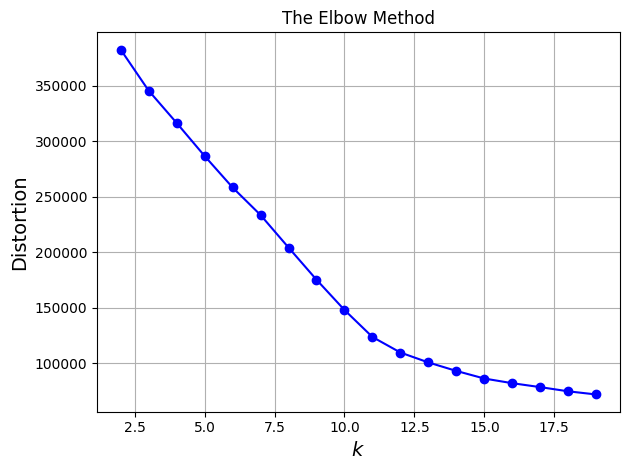

In [31]:
plt.figure()
plt.title('The Elbow Method')
plt.plot(Ks, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Distortion", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="text-align: justify;">

The **Elbow Method** uses the change in slope to indicate a potentially interesting number of clusters. In the case at hand there seems to be a change in slope between 11 and 12 clusters. 

</div>

In [32]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k]

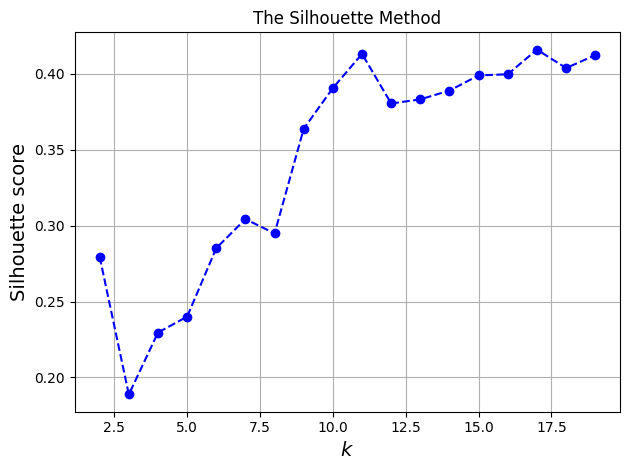

In [33]:
plt.plot(Ks, silhouette_scores, "bo--")
plt.title('The Silhouette Method')
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Silhouette score", fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="text-align: justify;">

The **Silhouette Method** measures how similar a point is to its own cluster compared to other clusters and computes a coefficient. The higher the final coefficient the more optimal the number of clusters. The highest coefficients for the case are reached at 11 clusters followed by 17. To try avoid incurring in an overfitting problem or selecting too many clusters that might dilude some common-share characteristics we select 11 clusters. It could be argued that the distribution among clusters is not entirely homogeneous ranging between 604 and 7509. This result, however, is to be expected, since we observed in the exploratory analysis of the data that the age group of 30 to 40 or the administrator, technician or blue-collar employments are considerably more frecuent within the data. 

</div>

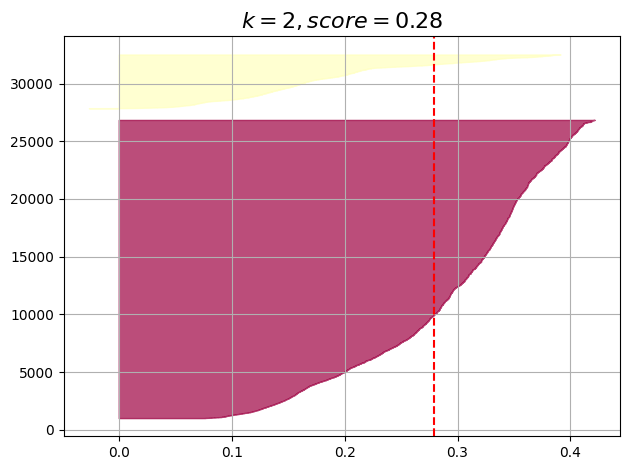

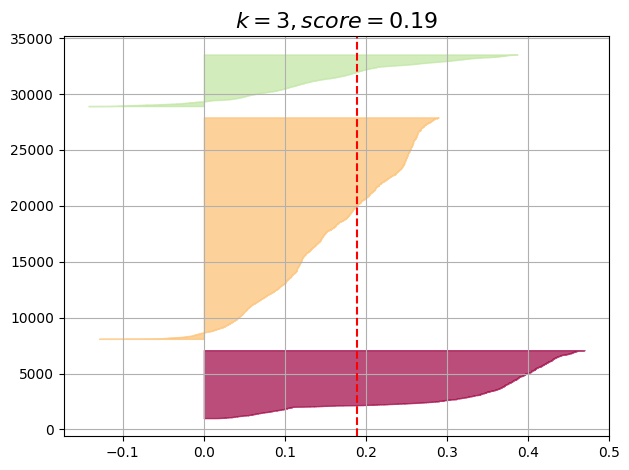

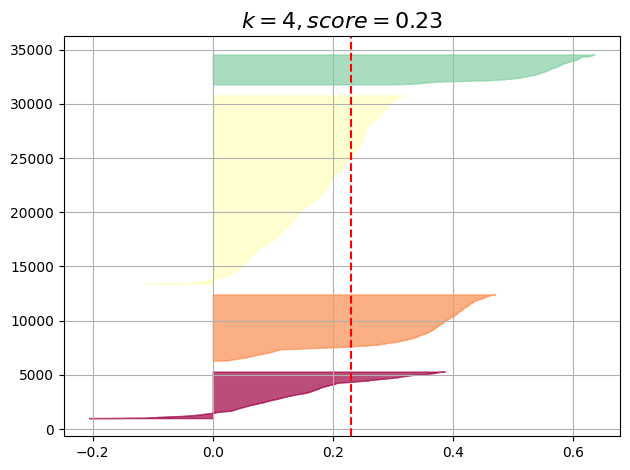

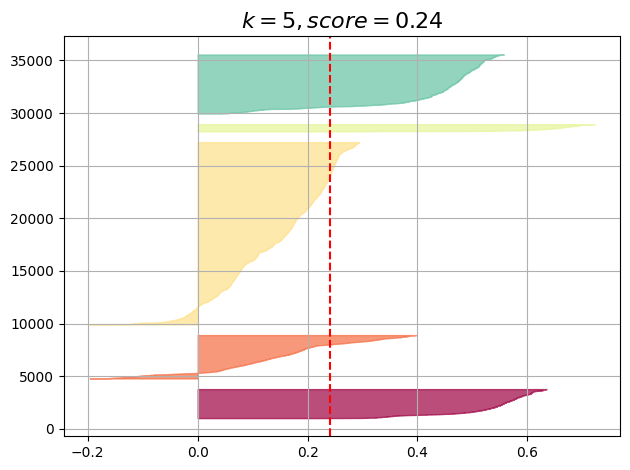

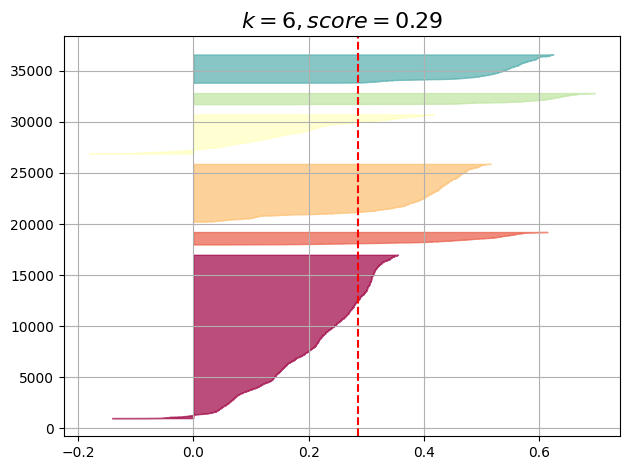

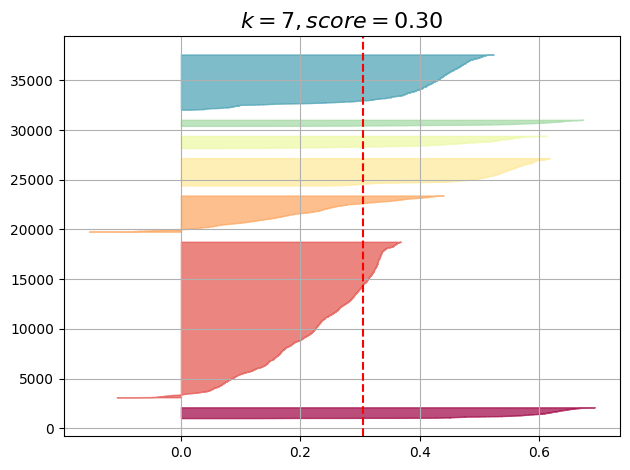

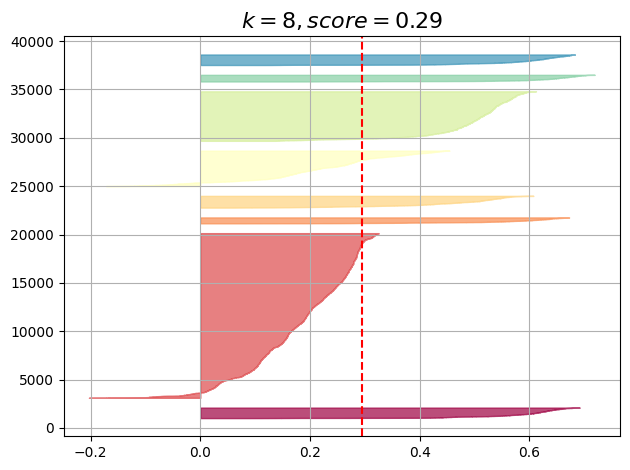

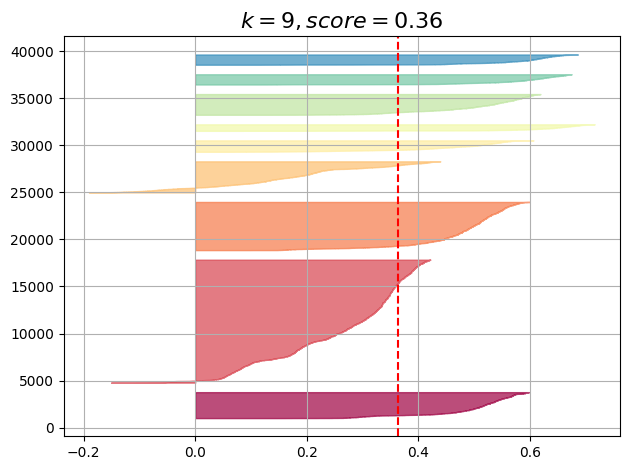

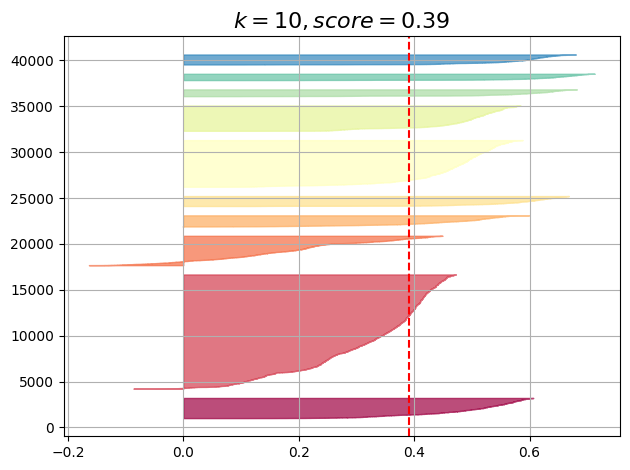

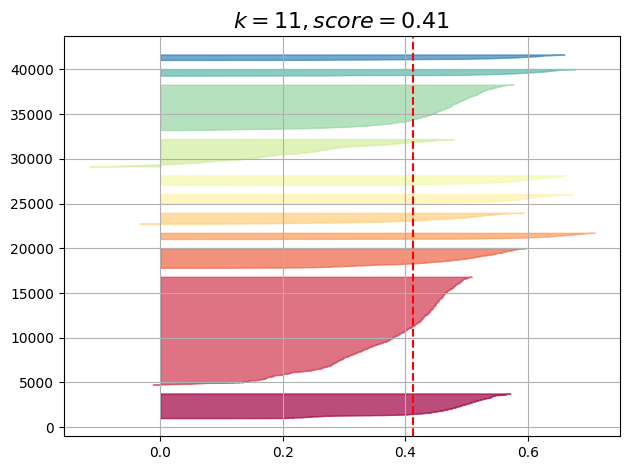

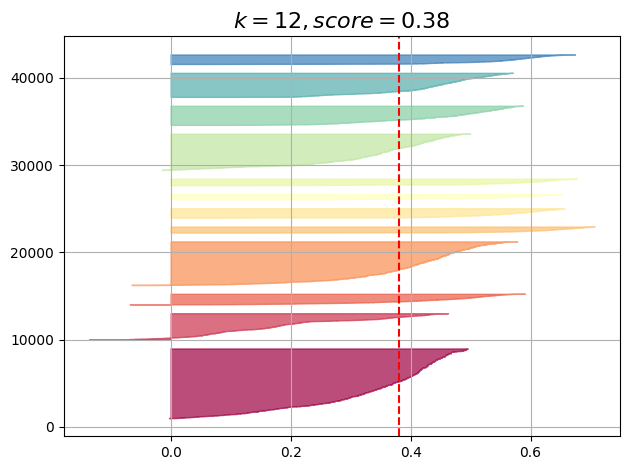

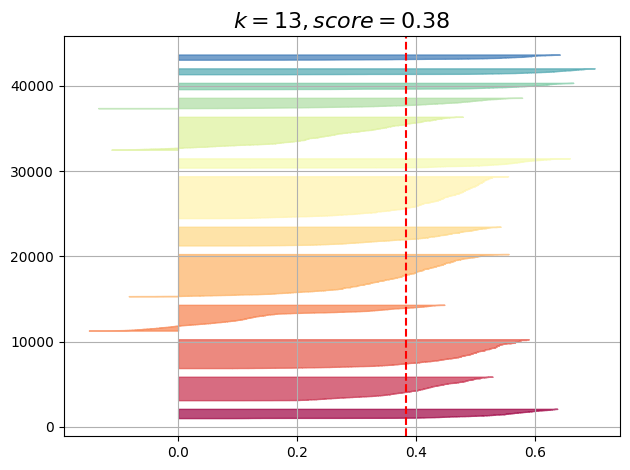

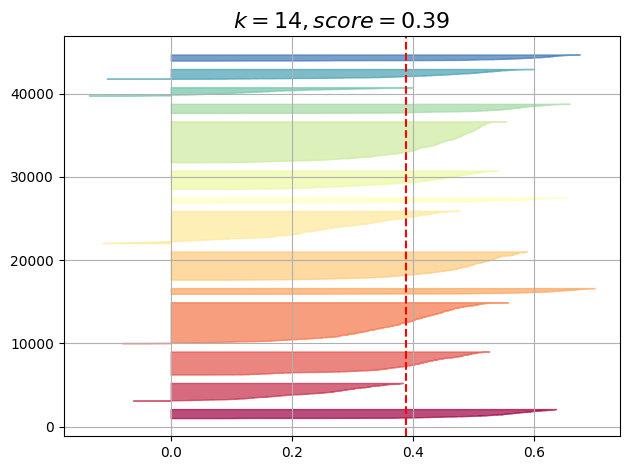

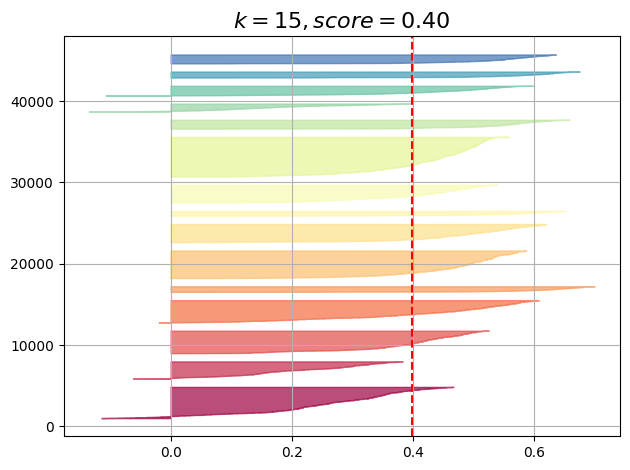

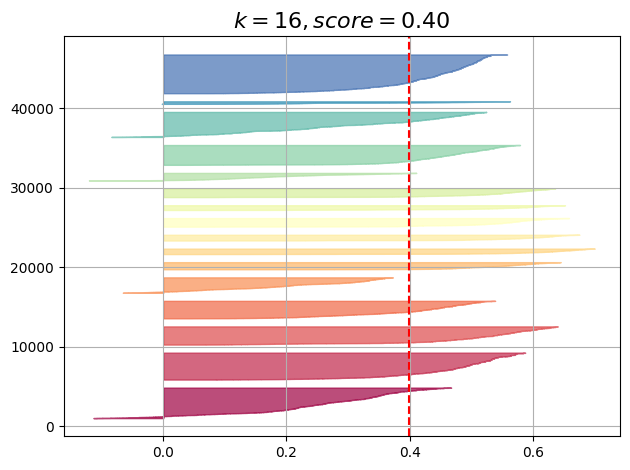

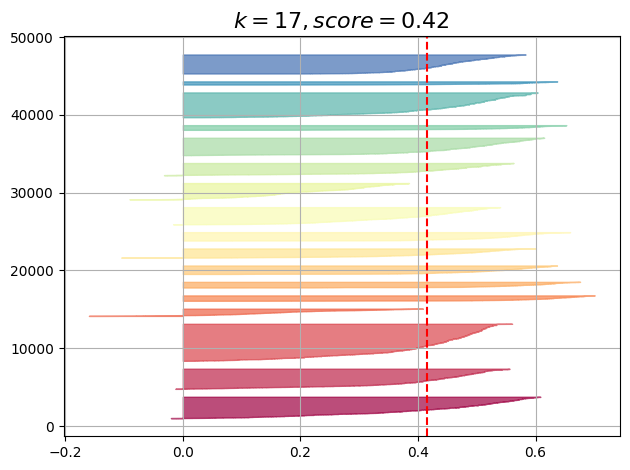

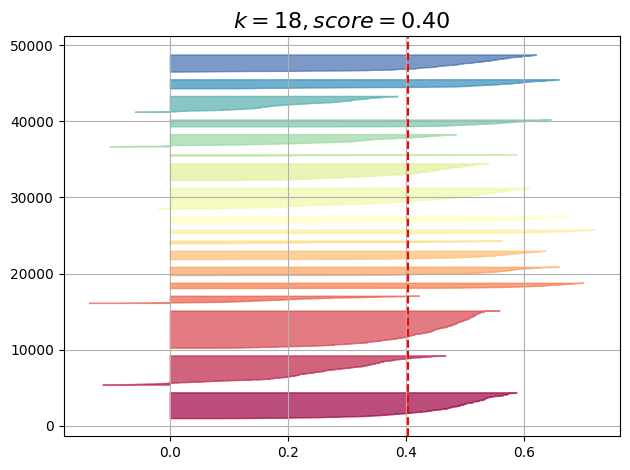

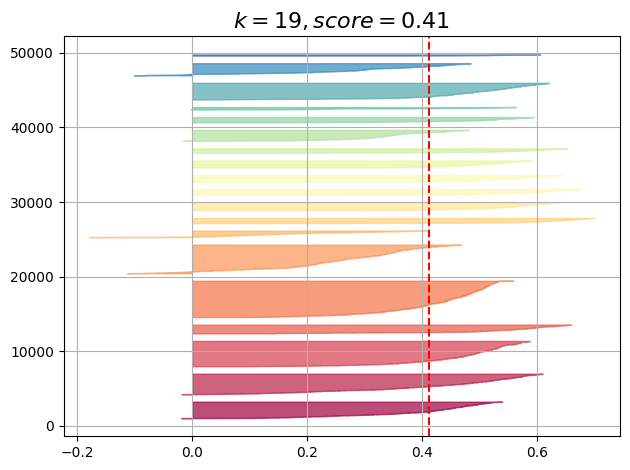

In [34]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import matplotlib as mpl

warnings.filterwarnings("ignore")

def plot_silhouette(model, X):
    mu = model.cluster_centers_
    K, D = mu.shape
    y_pred = model.labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    silhouette_scores = silhouette_score(X, model.labels_)
    cmap = cm.get_cmap("Pastel2")
    padding = len(X) // 30
    pos = padding
    for i in range(K):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i / K)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        pos += len(coeffs) + padding
    score = silhouette_scores
    plt.axvline(x=score, color="red", linestyle="--")
    plt.title("$k={}, score={:0.2f}$".format(K, score), fontsize=16)
    plt.grid(True)


for model in kmeans_per_k:
    K, D = model.cluster_centers_.shape
    plt.figure()
    plot_silhouette(model, X_pca)
    fname = f"kmeans_silhouette_diagram{K}.pdf"
    plt.tight_layout()

In [35]:
kmeans = KMeans(n_clusters = 11, init = "k-means++").fit(X_pca)
cluster = kmeans.labels_
data["cluster"] = cluster

In [36]:
data["cluster"].value_counts()

cluster
1     7509
2     5503
9     5214
3     3961
10    2762
0     1260
7     1183
5     1077
8      728
4      687
6      604
Name: count, dtype: int64

In [37]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,cluster
0,-1.276935,2.857163,0.810943,1.225583,0.123620,0.711783,0.936789,-1.882517,5.255156,-2.645026,-1.528730,4
1,-1.218426,0.234944,-0.824408,0.853608,-1.317917,2.533478,-0.758327,-0.048149,-0.452924,0.269692,-0.541464,10
2,-1.290273,1.005618,-0.630418,0.812022,-0.031411,-0.042998,-0.054180,-0.185979,0.098000,-0.237263,0.538796,3
3,-1.191611,0.879793,0.193945,1.496398,-1.337675,2.423642,-1.027184,0.058828,-0.429953,-0.099789,0.125785,10
4,-1.030678,0.391627,0.737318,1.402879,-0.079340,-0.216189,-0.061046,-0.122434,-0.007489,-0.204662,0.519761,3
...,...,...,...,...,...,...,...,...,...,...,...,...
30483,0.011247,2.132360,4.814163,1.406235,0.455330,0.615057,0.158513,0.241629,-0.495207,0.102981,1.613348,7
30484,-1.092439,1.195839,-0.471647,0.140470,0.241502,-1.010313,-0.362105,0.156162,-0.336892,-0.133579,0.184066,2
30485,-0.139435,1.171965,3.766648,1.350088,0.403902,0.581177,0.185781,0.354877,-0.499191,0.134697,1.598208,7
30486,-0.851246,-0.897401,0.399081,0.949625,1.858135,0.101561,-0.474948,-0.178286,0.004798,-0.304636,0.372706,9


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 5. Conclusions and Potential Extensions </span>

<div style="text-align: justify;">

    The different stages of the analysis have proven to provide very insightful information. First the exploratory analysis has revealed the inefficiency of the current marketing campaign compared to previous approaches taken towards the audience. Further, the age group comprised between 30 and 40, as well as those people working as blue-collar workers, technicians or administrators are far more approached than other customer groups. 
    The PCA analysis has delved deeper into the observations made during the exploratory analysis, identifying that the outcome of the previous campaign, contacts established through telephones, as well as the age group, the consumer price index, and specific jobs such as blue-collar, technician and retired workers make up the features containing the most variance in its information. 
    Lastly, the clustering analyis has offered less clarity on its results. According to both, the Silhouette and the Elbow method, 11 clusters is the optimal amount. There does exist a clear imbalance between the dato in the 1st cluster , which is a situation far from ideal. However, the tails of the differentclusters are very slim and shorter than the ones present in the reamining ones. 
    In conclusion, the marketing campaign is clearly failing to achieve its purpose as inferred from the data. Focusing the attention in analysing blue-collar, technician and retired workers combined with different age groups and outcomes from previous campaigns  can provide insghtful information into which strategies are performing better and on which segments of the customer basis it is having a better or worse impact. 
    As for the clustering, there clearly are some latent relations between the featured variables. There seems to exist though, either a very broad group of individuals with common-shared characteristics or some variable that has a presence that overpower any other realtionship leading to the high imabalnce between clusters, especially with numer one. 
    Future work could hold delving deeper into the variables, analysing the interrelations more in depth. Moreover, including different variables and dropping others may reveal interactions that were not yet addressed. Lasltly, using other unsupervised learning approaches could potentially lead to more enriching conclusions. 

</div>